# 주성분분석(Principal Component Analysis)

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Iris 데이터로 PCA 

In [83]:
from sklearn.datasets import load_iris
iris = load_iris()

In [84]:
# 표준 스케일러로 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit과 transform을 동시에, 데이터가 표준정규분포를 따르게 변환됨
iris_standard = scaler.fit_transform(iris.data)

In [85]:
# 공분산 행렬
# 모집단일 땐 n(A), 표본집단일 땐 n(A) - 1
# ( A.T * A ) / n(A)
iris_cov = np.dot(iris_standard.T, iris_standard) / len(iris_standard)
iris_cov

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [86]:
# 이렇게도 구할 수 있음, 단 이건 표본집단 기준
np.cov(iris_standard.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [87]:
# 고유값, 고유벡터 
eig_vals, eig_vecs = np.linalg.eig(iris_cov)
# 1x4 고유벡터 총 4개
eig_vals, eig_vecs

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

(150,4) x 고유벡터 2개 가져오면 (4,2) = (150,2) 차원축소가능 <br>
단, 고유벡터는 지금 행렬이 아니라 어레이 (4,)니까 (4,1)로 만들어줘야 함 <br>
 ==> reshape(-1, 1) 사용

In [88]:
eig_vecs[0].shape

(4,)

In [89]:
eig_vecs[0].reshape(-1,1).shape

(4, 1)

In [90]:
# 주성분 PC1
PC1 = np.dot(iris_standard, eig_vecs[0].T.reshape(-1,1))
PC1[:5]

array([[-0.23323008],
       [ 0.0748986 ],
       [-0.18423663],
       [-0.24228936],
       [-0.38324685]])

In [91]:
# 주성분 PC2
PC2 = np.dot(iris_standard, eig_vecs[1].T.reshape(-1,1))
PC2[:5]

array([[-0.86330304],
       [ 0.26466784],
       [-0.10902903],
       [ 0.16392697],
       [-1.04320646]])

In [92]:
iris_PCA = pd.DataFrame({'PC1':PC1.reshape(-1,), 'PC2':PC2.reshape(-1,), 'species':iris.target})
iris_PCA.head()

,PC1,PC2,species
0,-0.233230,-0.863303,0
1,0.074899,0.264668,0
2,-0.184237,-0.109029,0
3,-0.242289,0.163927,0
4,-0.383247,-1.043206,0


sklearn으로 구하기

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

In [94]:
# fit() 과 transform() 으로 PCA 변환
pca.fit(iris_standard)
iris_pca = pca.transform(iris_standard)
iris_pca.shape

(150, 2)

In [95]:
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [96]:
# 첫번째 성분이 72%, 두번째 성분이 23% 정도를 설명한다
pca.explained_variance_ratio_


array([0.72962445, 0.22850762])

데이터 시각화

In [97]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

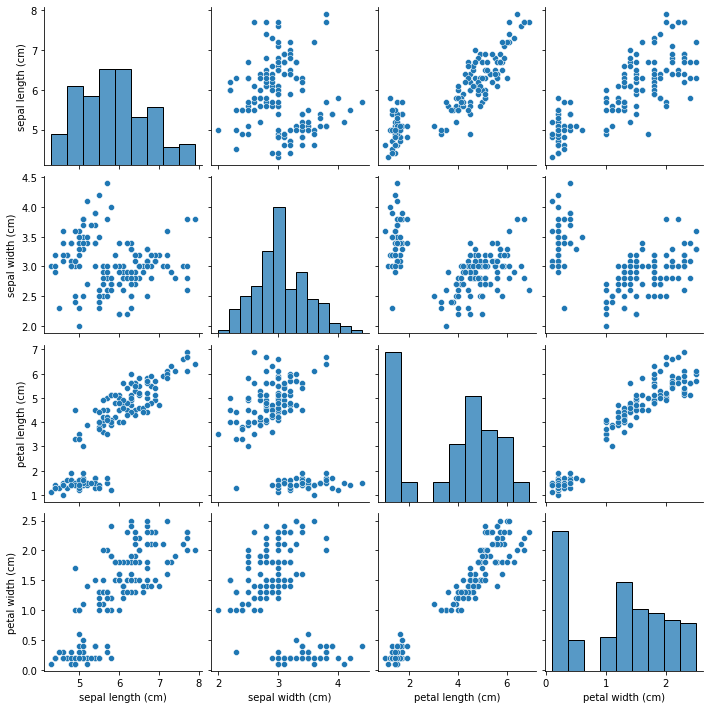

In [98]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
# 데이터가 많으니까 한 번에 못 보여주고 2개씪 짝지어서 나눠서 보여줌
sns.pairplot(iris_df)
plt.show()

In [99]:
iris_df['species'] = iris.target

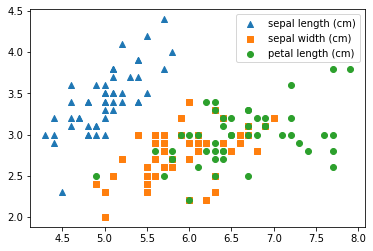

In [100]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers = ['^',"s",'o']

# setosa, versicolor, virginica target 값 순서대로 0, 1, 2
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df.species == i]['sepal length (cm)']
    y_axis_data = iris_df[iris_df.species == i]['sepal width (cm)']

    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.feature_names[i])
plt.legend()
plt.show()

PCA 변환 후 시각화

In [101]:
iris_pca_df = pd.DataFrame(data = iris_pca, columns=['PC1','PC2'])
iris_pca_df['species'] = iris.target
iris_pca_df.head()

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


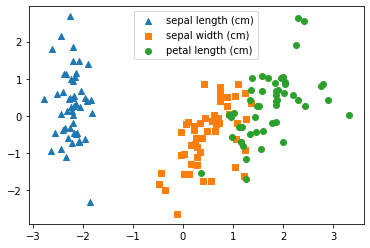

In [102]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers = ['^',"s",'o']

# setosa, versicolor, virginica target 값 순서대로 0, 1, 2
for i, marker in enumerate(markers):
    x_axis_data = iris_pca_df[iris_pca_df.species == i]['PC1']
    y_axis_data = iris_pca_df[iris_pca_df.species == i]['PC2']

    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.feature_names[i])
plt.legend()
plt.show()

차원 축소하기 전이랑 차원 축소한 이후의 분류 성능 비교

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.3, random_state=2021
)

In [105]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9111111111111111

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca_df[['PC1','PC2']], iris.target, stratify=iris.target, 
    test_size=0.3, random_state=2021
)

In [108]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9111111111111111

### 와인 데이터로 PCA

In [115]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [114]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [113]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [116]:
df['target'] = wine.target
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

PCA 변환

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

In [119]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [121]:
wine_pca = pca.fit_transform(wine_std)
wine_pca[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

시각화

In [124]:
wine_pca_df = pd.DataFrame(data=wine_pca, columns=['PC1','PC2'])
wine_pca_df['target'] = wine.target
wine_pca_df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


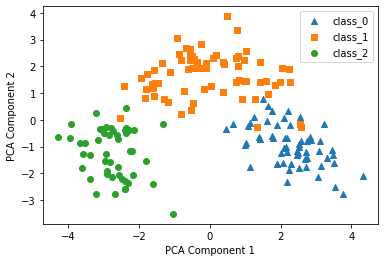

In [128]:
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = wine_pca_df[wine_pca_df['target']==i]['PC1']
    y_axis_data = wine_pca_df[wine_pca_df['target']==i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=wine.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()